# TP : Algorithmes d'Optimisation (Gradient et Newton)

**Durée :** 2h
**Objectif :** Implémenter et comparer des méthodes d'optimisation du premier et second ordre.

---

## Introduction

On considère le problème de minimisation suivant :
$$
\tag{P}\min_{x \in \mathbb{R}^d} f(x)
$$
où $f : \mathbb{R}^d\to \mathbb{R}$ est une fonction différentiable.

Nous utiliserons la **méthode de descente de gradient** (pas constant) :
$$
x_{k+1} = x_k -\gamma\nabla f(x_k),
$$
où $\gamma$ est le pas et $x_0$ le point initial. La convergence est garantie si $0<\gamma < 2/L$, où 
$L$ est la constante de Lipschitz du gradient. 
En particulier, si $f\in C^{2}$ on a $L = \sup_{x}\Vert \nabla^2 f(x)\Vert$ avec $\nabla^2 f(x)\in\mathcal{M}_{d,d}$ est la Hessienne de $f$ en $x$ et $\Vert\cdot\Vert$ est la norme spéctrale définie par $\Vert A\Vert = \sqrt{\lambda_{\max}(A^TA)}$.

---

## Exercice 1 : Le cas quadratique (warm-up)

On considère la fonction quadratique :
$$
f(x, y) = \frac{1}{2}(a x^2 +b y^2)
$$

**Q1.** Définir les oracles Python `f_quad(x)` et `grad_f_quad(x)`, i.e., des fonctions Python qui renvoient la valeur de $f$, est son gradient $\nabla f$. 

**Q2.** Implémenter une fonction  : `gradient_descent(f, grad_f, x0, gamma, epsilon, max_iter=10000)`.
* **Arrêt :** Si $\|\nabla f(x_k)\| \le \epsilon$.
* **Sorties :** Le point final `x_min` et un tableau `history` des itérés.

**Q3.** Tester l'algorithme avec $x_0 = (2, 5)$, $a = 1, b = 8$ et $\gamma = 0.1$. Tracer la valeur du coût $f(x_k)$ en fonction de $k$ et les itérés $x_k$ superposés aux courbes de niveau de `f`.

**Q4.** **Analyse.** Dans l'objectif d'observer l’effet du pas, du point initial et du conditionnement, reprendre les questions précédentes en faisant varier: i) les valeurs du pas $\gamma$, ii) plusieurs points initiaux $x_0$, iii) différents couples $(a, b)$.

---


## Exercice 2 : La fonction de Rosenbrock (Problème non-convexe)

On considère la fonction de Rosenbrock qui admet un minimum global en $(1,1)$ :
$$
g(x,y) = 100(y-x^2)^2 + (1-x)^2.
$$

Pour gagner du temps, son gradient est :
$$
\nabla g(x, y) = \begin{pmatrix} -400x(y-x^2) - 2(1-x) \\ 200(y-x^2) \end{pmatrix}
$$

**Q1.** Implémenter les oracles `f_rosen(x)` et `grad_f_rosen(x)`.

**Q2.** Tester `gradient_descent` sur $g$ en partant de $x_0 = (2, 5)$ avec un petit pas (eg: $\gamma = 0.002$).

**Q3.** **Recherche Linéaire avec rebroussement (Backtracking).** Implémenter `gradient_descent_backtracking`.
* **Condition :** Tant que le pas $\gamma$ ne satisfait pas :
    $$f(x_k - \gamma \nabla f(x_k)) \le f(x_k) - \alpha \gamma \|\nabla f(x_k)\|^2$$
    on réduit $\gamma \leftarrow \beta \gamma$.
* Utiliser $\gamma = 2,\alpha=0.25$ et $\beta=0.5$.

---

## Exercice 3 : Méthode de Newton

La méthode de Newton est définie par :
$$
x_{k+1} = x_k - [\nabla^{2}f(x_k)]^{-1}\nabla f(x_k).
$$

La matrice Hessienne de la fonction de Rosenbrock (pour l'oracle `hess_f_rosen`) est:
$$
\nabla^2 g(x, y) = \begin{pmatrix} 1200x^2 - 400y + 2 & -400x \\ -400x & 200 \end{pmatrix}.
$$

**Q1.** Implémenter la fonction `newton_method(f, grad_f, hess_f, x0, epsilon, max_iter)`.

**Q2.** Comparer la vitesse de convergence des trois méthodes implémentées (Newton, Gradient à pas constant et le Gradient avec Backtracking) en utilisant les fonctions $f$ et $g$.

---

In [13]:
# Exercice 1 1215 iterations



#Question1

def f_quad(x):
    return 0.5*(a*x[0]**2 + b*x[1]**2)
def grad_f_quad(x):
    return (a*x[0] , b*x[1])
def norme(x):
    return (x[0]**2 + x[1]**2)**0.5
    

In [79]:
#Question 2 
def gradient_descent(f, grad_f, x0, gamma, epsilon, max_iter=10000) :
    history = [x0]
    i=0
    while norme(grad_f(x0)) > epsilon and i < max_iter:
        grad = grad_f(x0)  
        x0[0] = x0[0] - gamma * grad[0]
        x0[1] = x0[1] - gamma * grad[1]
        history.append(x0.copy())
        # print(x0)
        # print(grad)
        i= i+1
    if i >= max_iter:
        print("Pas de convergence .(Pensez a diminuez gamma)")
    if norme(grad_f(x0)) <= epsilon:
        print(f"minimum trouver apres {i} iterations")
        
    return history
    
        


minimum trouver apres 116 iterations


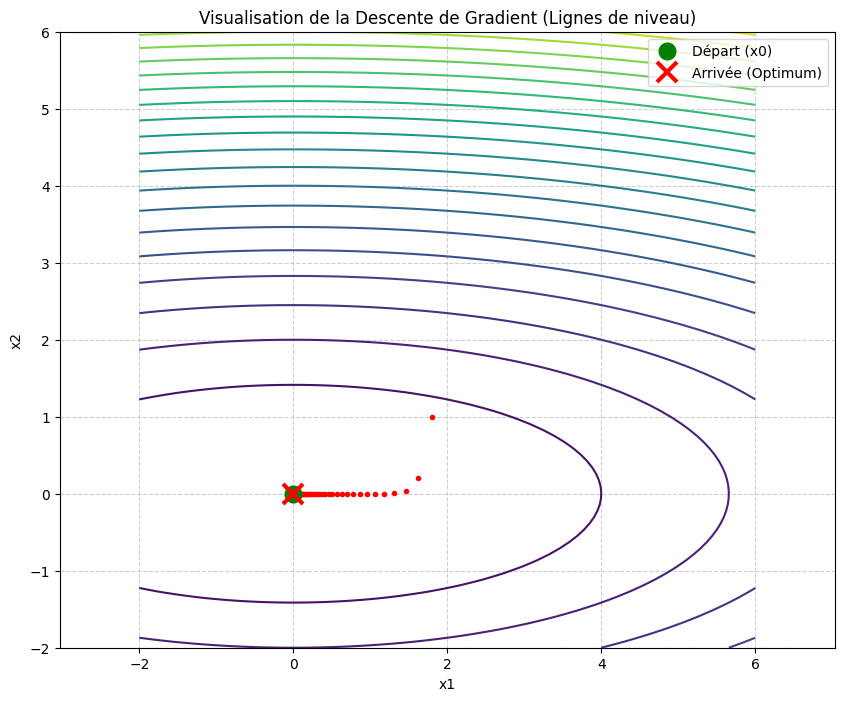

In [54]:
#Question 3 
import matplotlib.pyplot as plt

a= 1
b=8
gamma = 0.1
def plot_resultat(f, grad_f,point_ini,couple,gamma):
    history = gradient_descent(f, grad_f, point_ini, gamma, 0.00001)
    path_x = [point[0] for point in history]
    path_y = [point[1] for point in history]
    
    # Détermination des limites de la grille
    x_min = min(min(path_x) - 1, -2)
    x_max = max(max(path_x) + 1, 6)
    y_min = min(min(path_y) - 1, -2)
    y_max = max(max(path_y) + 1, 6)
    
    # Création de la grille pour les lignes de niveau
    n_points = 100
    x_grid = [x_min + i * (x_max - x_min) / (n_points - 1) for i in range(n_points)]
    y_grid = [y_min + i * (y_max - y_min) / (n_points - 1) for i in range(n_points)]
    
    # Création de X, Y et Z pour les contours
    X = [[x for x in x_grid] for _ in range(n_points)]
    Y = [[y_grid[i] for _ in range(n_points)] for i in range(n_points)]
    Z = [[f([X[i][j], Y[i][j]]) for j in range(n_points)] for i in range(n_points)]
    
    # Affichage
    plt.figure(figsize=(10, 8))
    
    # Tracer les lignes de niveau (Contours)
    cp = plt.contour(X, Y, Z, levels=20, cmap='viridis')
    
    
    # Tracer le chemin de la descente
    #plt.plot(path_x, path_y, 'r-', label='Trajectoire Gradient', linewidth=2, alpha=0.7)
    plt.plot(path_x, path_y, 'r.', markersize=6)
    
    # Marquer le départ et l'arrivée
    plt.plot(path_x[0], path_y[0], 'go', label='Départ (x0)', markersize=12)
    plt.plot(path_x[-1], path_y[-1], 'rx', label='Arrivée (Optimum)', 
             markersize=14, markeredgewidth=3)
    
    plt.title("Visualisation de la Descente de Gradient (Lignes de niveau)")
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.axis('equal')
    plt.show()
plot_resultat(f_quad,grad_f_quad,[2,5],[1,8],.1)

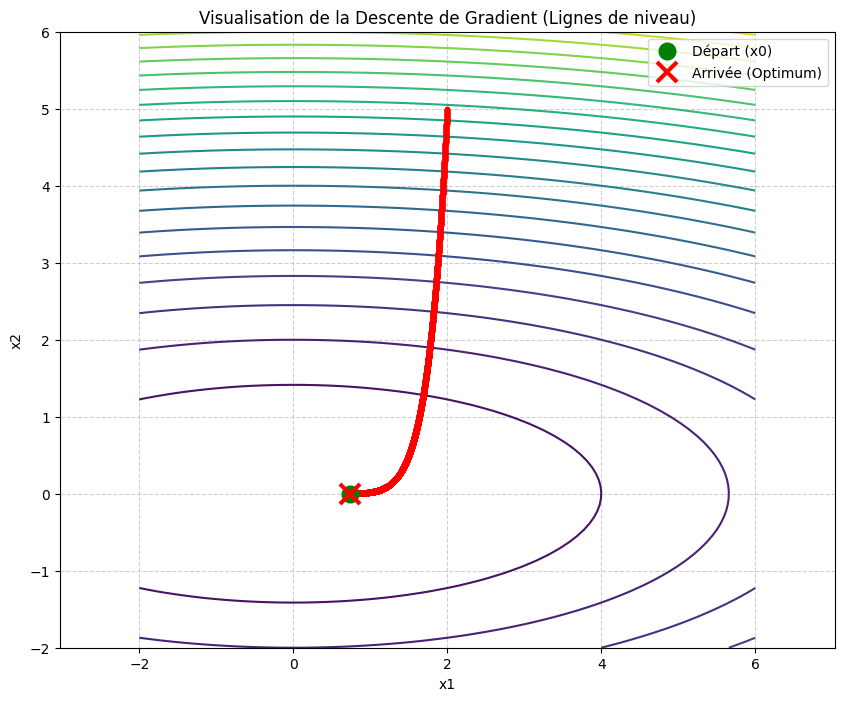

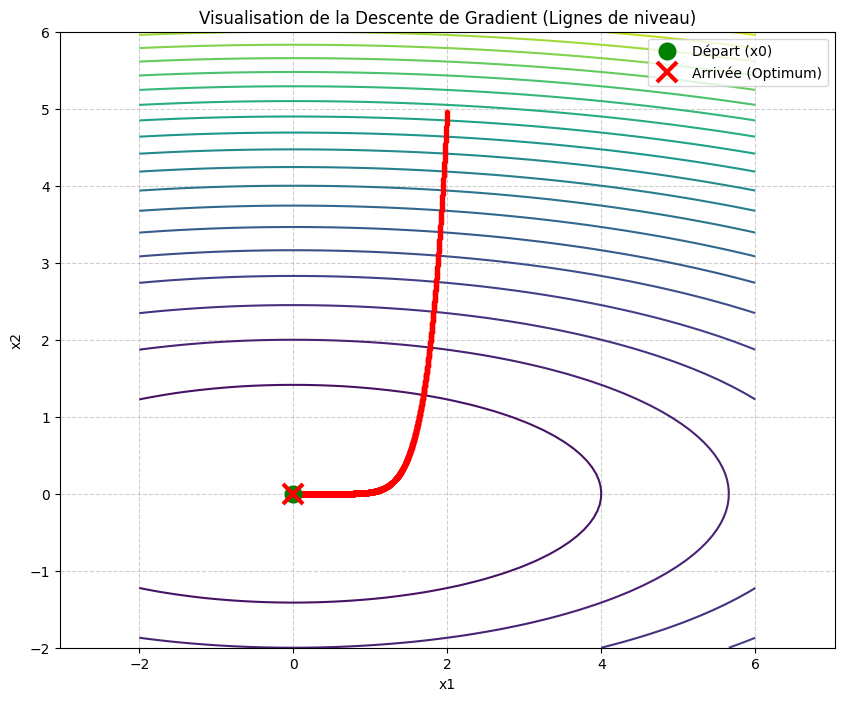

minimum trouver apres 1215 iterations


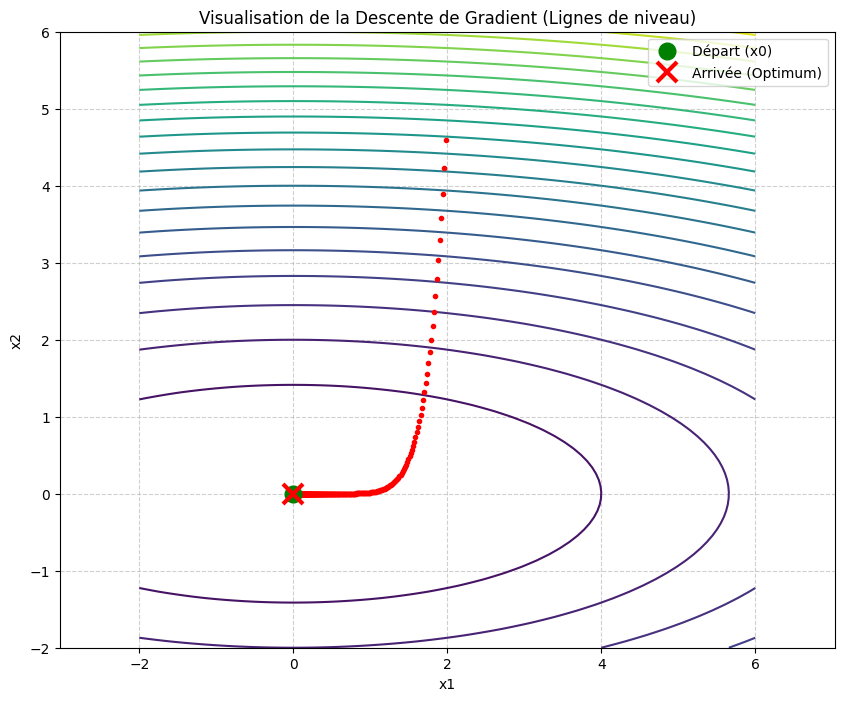

In [56]:
#Question4
#varier: i) les valeurs du pas , ii) plusieurs points initiaux , iii) différents couples .
couples = [[1,1],[3,12],[4,8]]
gammas = [0.0001,0.001,0.01]
points_initiaux = [[1,1],[24,0],[-3,-14]]
for gamma in gammas :
    plot_resultat(f_quad,grad_f_quad,[2,5],[1,8],gamma)


minimum trouver apres 1146 iterations


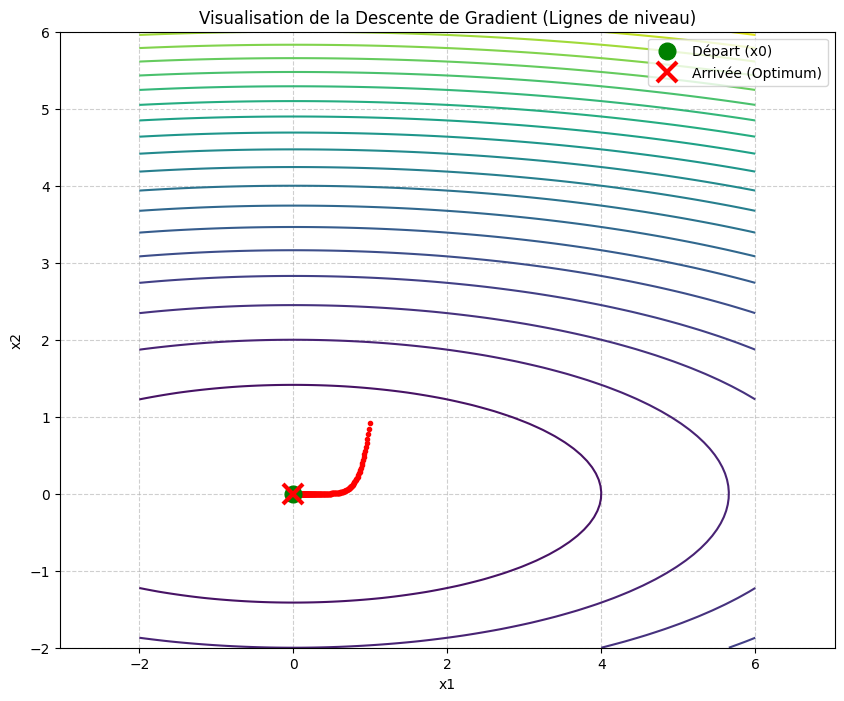

minimum trouver apres 1462 iterations


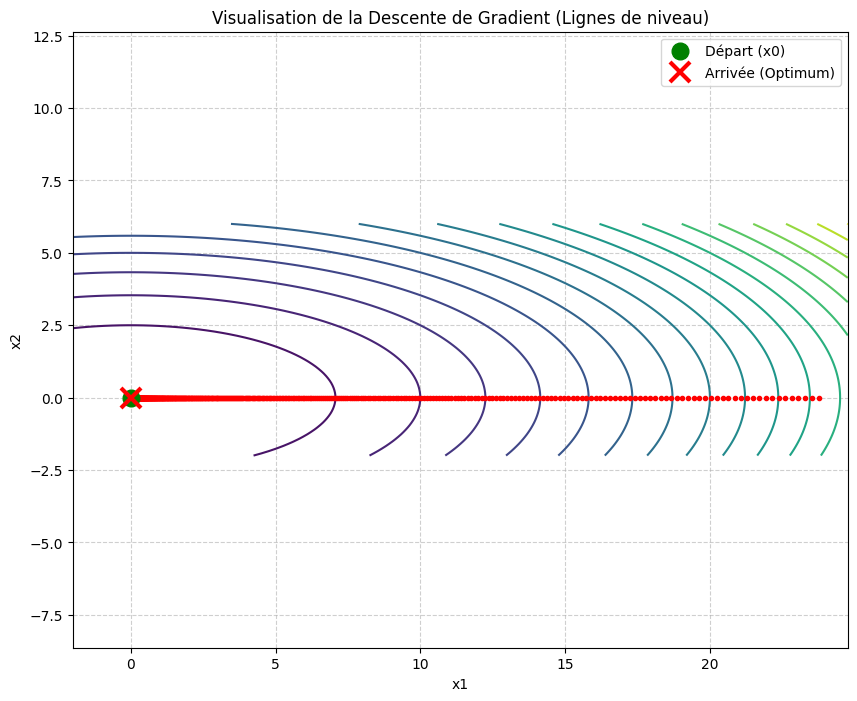

minimum trouver apres 1255 iterations


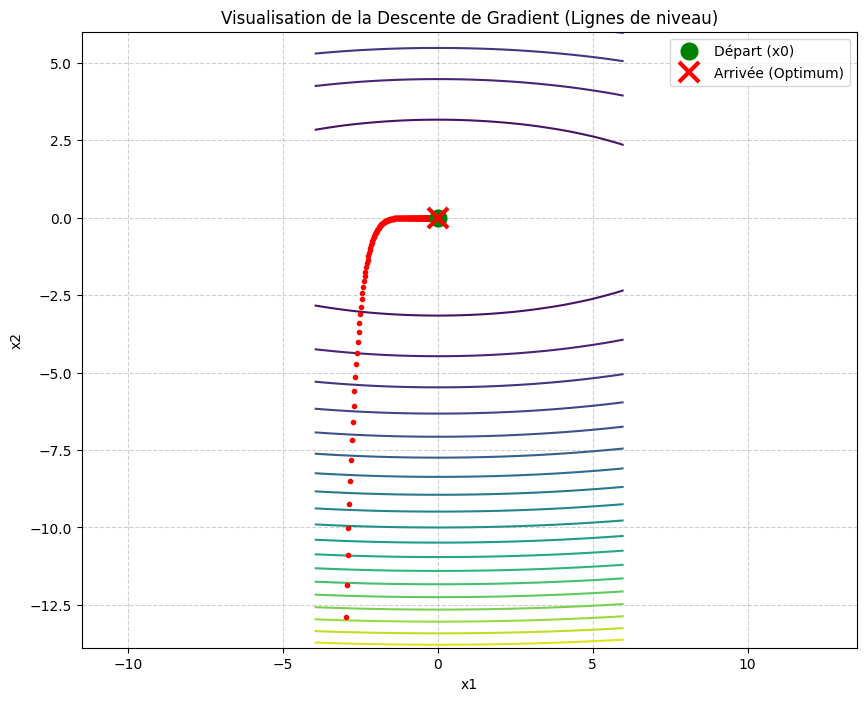

In [57]:
for point in points_initiaux :
    plot_resultat(f_quad,grad_f_quad,point,[1,8],0.01)

minimum trouver apres 1314 iterations


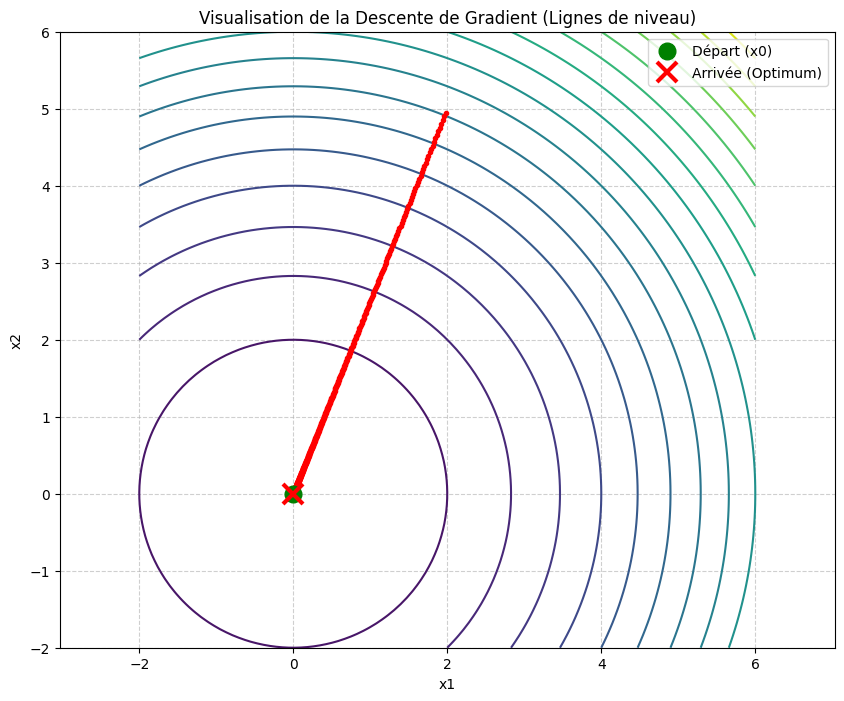

minimum trouver apres 437 iterations


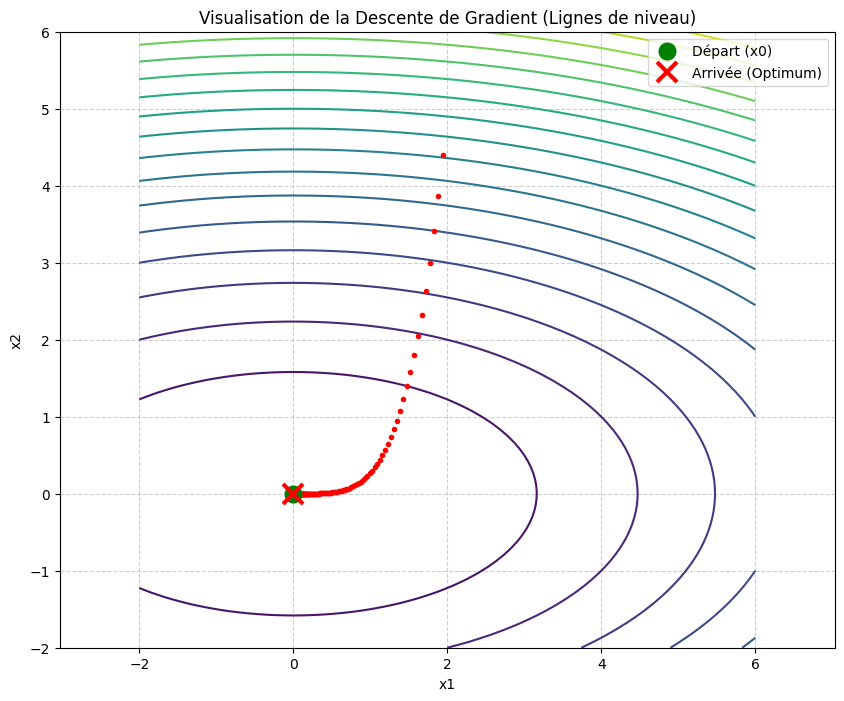

minimum trouver apres 333 iterations


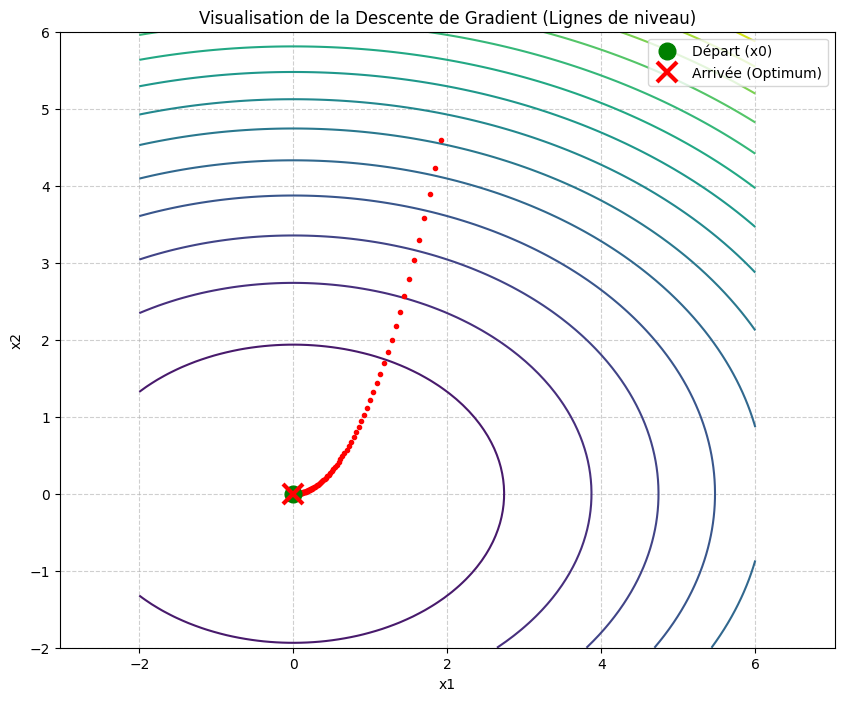

In [59]:
for couple in couples  : #= [[1,1],[3,12],[4,8]]
    a,b = couple
    def f_quad(x):
        return 0.5*(a*x[0]**2 + b*x[1]**2)
    plot_resultat(f_quad,grad_f_quad,[2,5],[1,8],gamma)

In [61]:
#Exercice 2 
#question1

In [64]:
def f_rosen(x):
    x, y = x[0], x[1]
    return 100*(y-x**2)**2 + (1-x)**2

def grad_f_rosen(x):
    x, y = x[0], x[1]
    return [-400*x*(y-x**2) - 2*(1-x),200*(y-x**2)]


In [78]:
xrosen, hist_rosen = gradient_descent(f_rosen, grad_f_rosen, [2,5], 0.002, 1e-2)
print(xrosen)

ValueError: too many values to unpack (expected 2)

Erreur Buffer Overflow . On a depasser la taille maximale des int qui est de $2^{31}$

In [85]:
def gradient_descent_backtracking(f, grad_f, x0, gamma, alpha, beta, epsilon):
    max_iter  = 10000
    x, y = x0[0], x0[1]
    history  =[(x, y, gamma)]

    for k in range(max_iter):
        gx, gy = grad_f((x,y))
        norm = gx**2 + gy**2

        if norm**0.5 < epsilon :
            break

        while f_rosen((x - gamma*gx, y- gamma*gy)) > f_rosen((x,y)) -alpha * gamma * norm :
            gamma = gamma*beta

        x = x - gamma * gx
        y = y - gamma * gy
        history.append((x, y, gamma))

    return history

le minimum trouve au point de coordonnees :  (1.9355896867168596, 3.7487731108203177)  gamma final :  0.000244140625


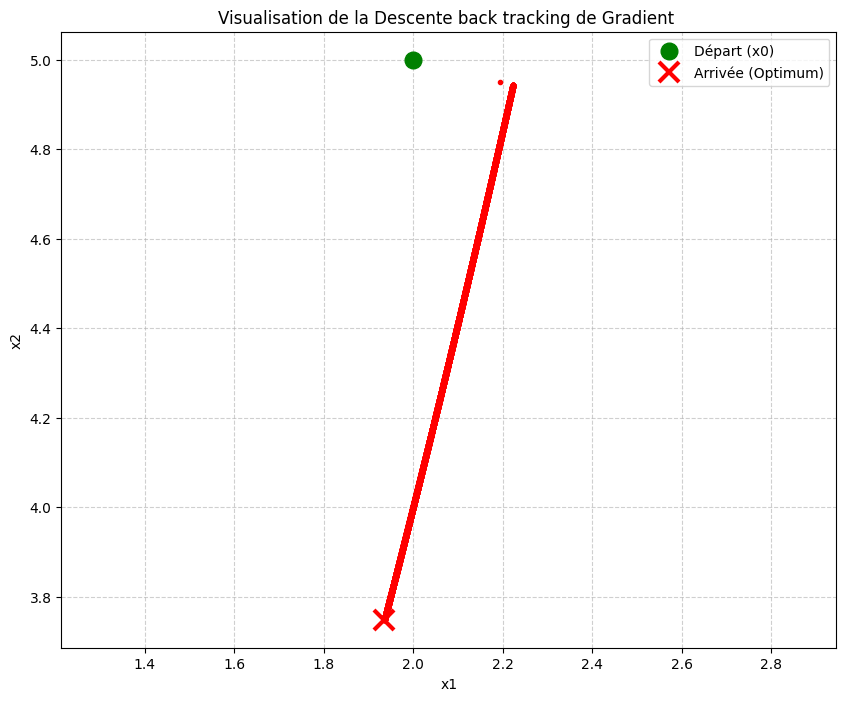

In [94]:
history = gradient_descent_backtracking(f_rosen, grad_f_rosen, [2,5],2, 0.25,0.5, 1e-6)

print("le minimum trouve au point de coordonnees : ",hist_back[-1][0:2], " gamma final : ",hist_back[-1][2] )

path_x = [point[0] for point in history]
path_y = [point[1] for point in history]

# Détermination des limites de la grille
x_min = min(min(path_x) - 1, -2)
x_max = max(max(path_x) + 1, 6)
y_min = min(min(path_y) - 1, -2)
y_max = max(max(path_y) + 1, 6)

# Création de la grille pour les lignes de niveau
n_points = 100
x_grid = [x_min + i * (x_max - x_min) / (n_points - 1) for i in range(n_points)]
y_grid = [y_min + i * (y_max - y_min) / (n_points - 1) for i in range(n_points)]

# Création de X, Y et Z pour les contours
X = [[x for x in x_grid] for _ in range(n_points)]
Y = [[y_grid[i] for _ in range(n_points)] for i in range(n_points)]
Z = [[f_rosen([X[i][j], Y[i][j]]) for j in range(n_points)] for i in range(n_points)]

# Affichage
plt.figure(figsize=(10, 8))

# Tracer le chemin de la descente
#plt.plot(path_x, path_y, 'r-', label='Trajectoire Gradient', linewidth=2, alpha=0.7)
plt.plot(path_x, path_y, 'r.', markersize=6)

# Marquer le départ et l'arrivée
plt.plot(path_x[0], path_y[0], 'go', label='Départ (x0)', markersize=12)
plt.plot(path_x[-1], path_y[-1], 'rx', label='Arrivée (Optimum)', 
         markersize=14, markeredgewidth=3)

plt.title("Visualisation de la Descente back tracking de Gradient ")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.axis('equal')
plt.show()

In [ ]:
#Exercice3

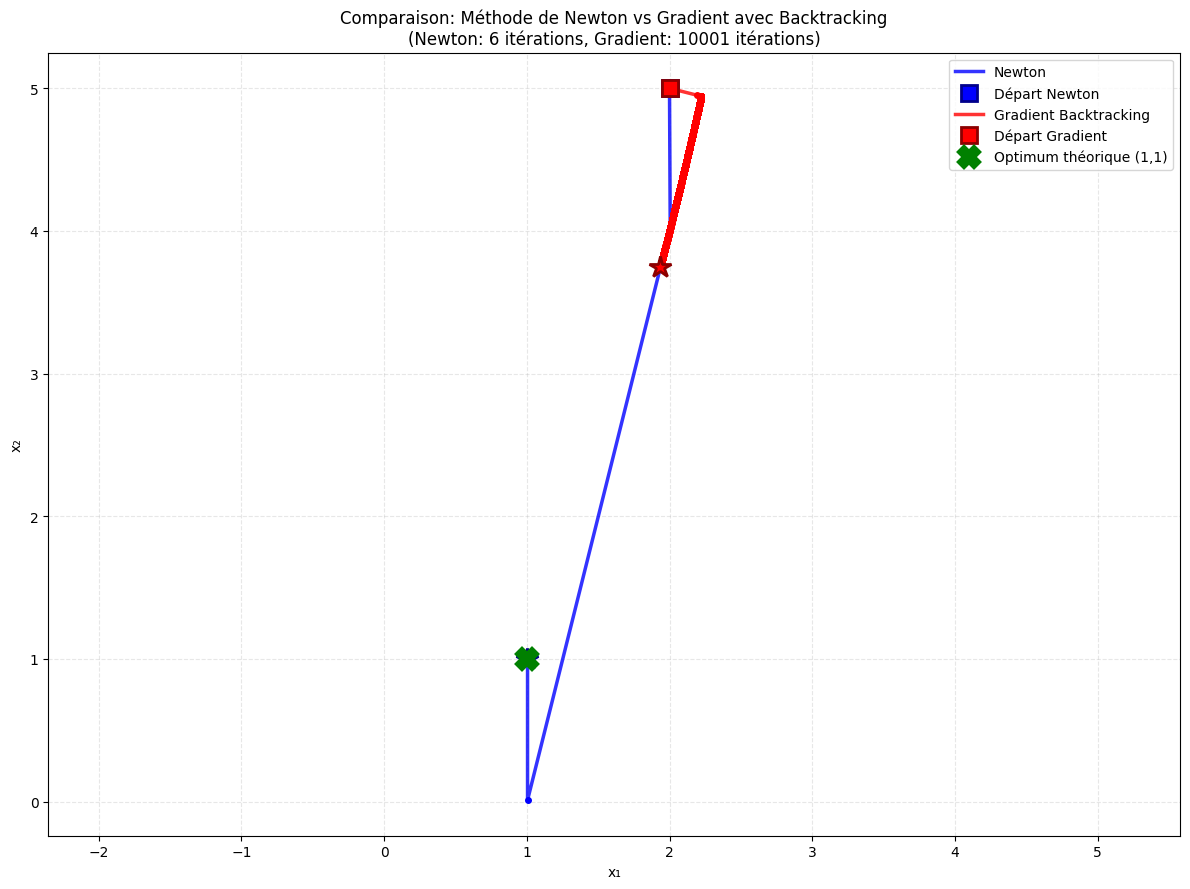

In [128]:
def hess_f_rosen(x):
    x, y = x[0], x[1]
    return np.array([[1200*x**2 - 400*y + 2, -400*x], [-400*x, 200]])

def newton_method(f, grad_f, hess_f, x0, epsilon, max_iter = 10000):
    x, y = x0[0], x0[1]
    history = [(x, y)]
    for _ in range(max_iter):
        gx, gy = grad_f((x,y))
        hess_inv = np.linalg.inv(hess_f((x,y)))
        norm = (gx**2 + gy**2)**0.5
        
        if norm < epsilon:
            break

        (x, y) = (x, y)  - hess_inv @ grad_f((x, y))
        history.append((x,y))

    return history
    
histnewton = newton_method(f_rosen,grad_f_rosen,hess_f_rosen,[2,5],1e-5, 10000)
hist = gradient_descent_backtracking(f_rosen, grad_f_rosen, [2,5], 2, 0.25, 0.5, 1e-5)






newton_x = [point[0] for point in histnewton]
newton_y = [point[1] for point in histnewton]

# Extraction des coordonnées pour la descente de gradient
grad_x = [point[0] for point in hist]
grad_y = [point[1] for point in hist]

# Détermination des limites de la grille (incluant les deux trajectoires)
all_x = newton_x + grad_x
all_y = newton_y + grad_y

x_min = min(all_x) - 0.5
x_max = max(all_x) + 0.5
y_min = min(all_y) - 0.5
y_max = max(all_y) + 0.5

# Création de la grille pour les lignes de niveau
n_points = 200
x_grid = [x_min + i * (x_max - x_min) / (n_points - 1) for i in range(n_points)]
y_grid = [y_min + i * (y_max - y_min) / (n_points - 1) for i in range(n_points)]

# Création de X, Y et Z pour les contours (fonction de Rosenbrock)
X = [[x for x in x_grid] for _ in range(n_points)]
Y = [[y_grid[i] for _ in range(n_points)] for i in range(n_points)]
Z = [[f_rosen([X[i][j], Y[i][j]]) for j in range(n_points)] for i in range(n_points)]

# Affichage
plt.figure(figsize=(12, 9))

# Trajectoire Newton (BLEU)
plt.plot(newton_x, newton_y, 'b-', label='Newton', linewidth=2.5, alpha=0.8)
plt.plot(newton_x, newton_y, 'b.', markersize=8)
plt.plot(newton_x[0], newton_y[0], 'bs', markersize=12, 
         markeredgecolor='darkblue', markeredgewidth=2, label='Départ Newton')
plt.plot(newton_x[-1], newton_y[-1], 'b*', markersize=16, 
         markeredgecolor='darkblue', markeredgewidth=2)

# Trajectoire Gradient avec Backtracking (ROUGE)
plt.plot(grad_x, grad_y, 'r-', label='Gradient Backtracking', linewidth=2.5, alpha=0.8)
plt.plot(grad_x, grad_y, 'r.', markersize=8)
plt.plot(grad_x[0], grad_y[0], 'rs', markersize=12, 
         markeredgecolor='darkred', markeredgewidth=2, label='Départ Gradient')
plt.plot(grad_x[-1], grad_y[-1], 'r*', markersize=16, 
         markeredgecolor='darkred', markeredgewidth=2)

# Marquer l'optimum théorique (1, 1) pour Rosenbrock
plt.plot(1, 1, 'gX', markersize=14, markeredgewidth=3, 
         label='Optimum théorique (1,1)')

plt.title("Comparaison: Méthode de Newton vs Gradient avec Backtracking\n" + 
          f"(Newton: {len(histnewton)} itérations, Gradient: {len(hist)} itérations)")
plt.xlabel("x₁")
plt.ylabel("x₂")
plt.legend(loc='best', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.3)
plt.axis('equal')


plt.tight_layout()
plt.show()


minimum trouver apres 333 iterations


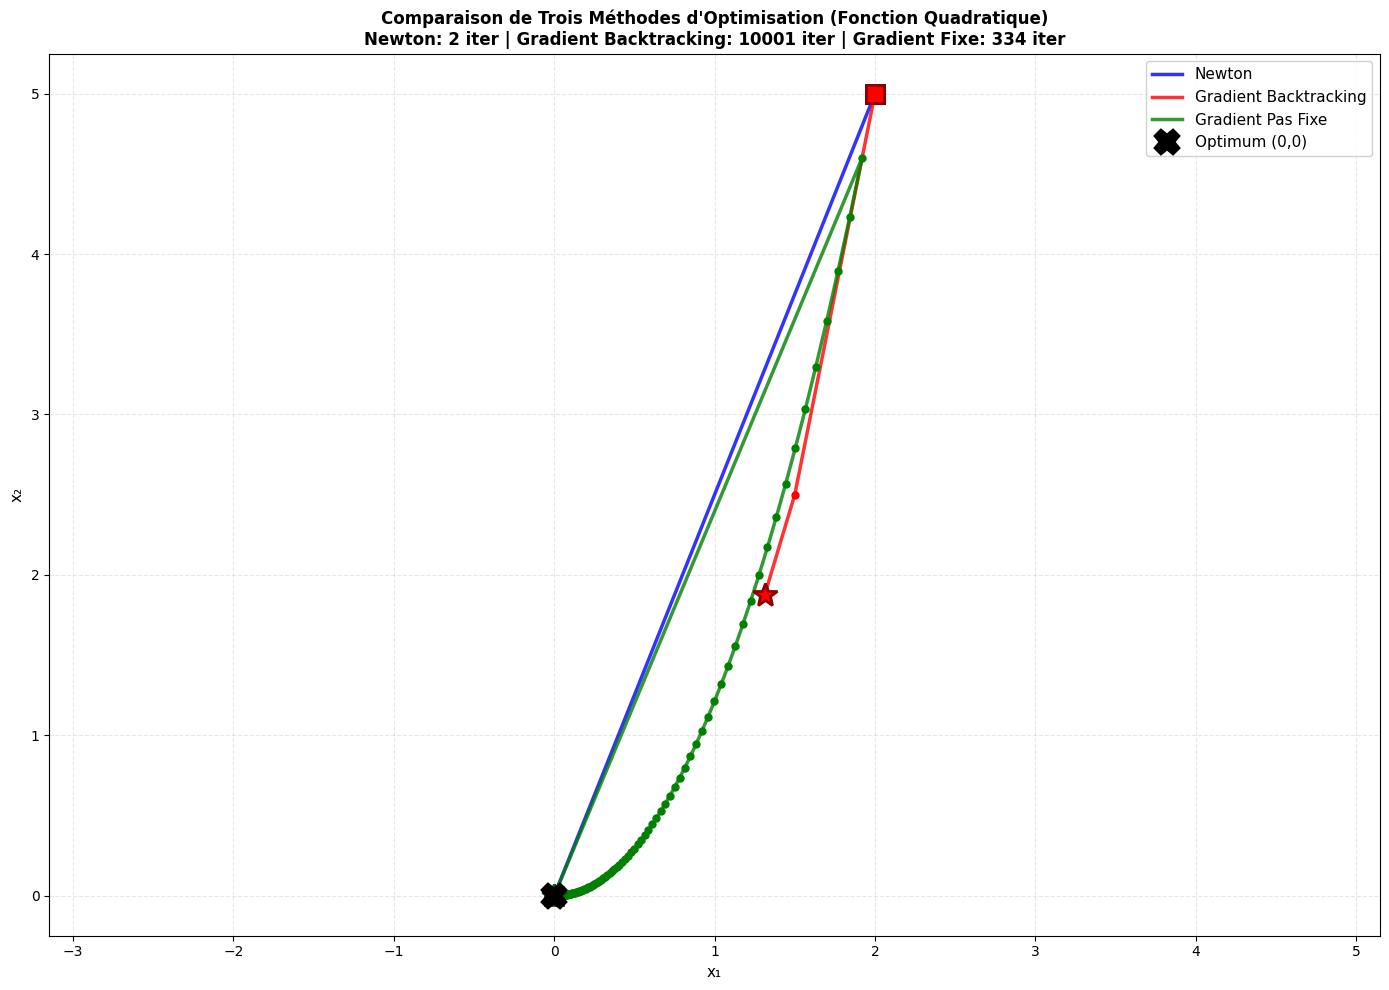

In [136]:
def hess_f_quad(x):
    return [[a,0],[0,b]]
    
histnewton = newton_method(f_quad,grad_f_quad,hess_f_quad,[2,5],1e-5, 10000)
hist = gradient_descent_backtracking(f_quad, grad_f_quad, [2,5], 2, 0.25, 0.5, 1e-5)
hist_gradient = gradient_descent(f_quad,grad_f_quad,[2,5],0.01,1e-5)


newton_x = [point[0] for point in histnewton]
newton_y = [point[1] for point in histnewton]

# Extraction des coordonnées pour Gradient Backtracking
backtrack_x = [point[0] for point in hist]
backtrack_y = [point[1] for point in hist]

# Extraction des coordonnées pour Gradient à pas fixe
gradient_x = [point[0] for point in hist_gradient]
gradient_y = [point[1] for point in hist_gradient]

# Détermination des limites de la grille (incluant les trois trajectoires)
all_x = newton_x + backtrack_x + gradient_x
all_y = newton_y + backtrack_y + gradient_y

x_min = min(all_x) - 0.5
x_max = max(all_x) + 0.5
y_min = min(all_y) - 0.5
y_max = max(all_y) + 0.5

# Création de la grille pour les lignes de niveau
n_points = 200
x_grid = [x_min + i * (x_max - x_min) / (n_points - 1) for i in range(n_points)]
y_grid = [y_min + i * (y_max - y_min) / (n_points - 1) for i in range(n_points)]

# Création de X, Y et Z pour les contours (fonction quadratique)
X = [[x for x in x_grid] for _ in range(n_points)]
Y = [[y_grid[i] for _ in range(n_points)] for i in range(n_points)]
Z = [[f_quad([X[i][j], Y[i][j]]) for j in range(n_points)] for i in range(n_points)]

# Affichage
plt.figure(figsize=(14, 10))

# Trajectoire Newton (BLEU)
plt.plot(newton_x, newton_y, 'b-', label='Newton', linewidth=2.5, alpha=0.8, zorder=3)
plt.plot(newton_x, newton_y, 'b.', markersize=10, zorder=4)
plt.plot(newton_x[0], newton_y[0], 'bs', markersize=13, 
         markeredgecolor='darkblue', markeredgewidth=2, zorder=5)
plt.plot(newton_x[-1], newton_y[-1], 'b*', markersize=18, 
         markeredgecolor='darkblue', markeredgewidth=2, zorder=5)

# Trajectoire Gradient avec Backtracking (ROUGE)
plt.plot(backtrack_x, backtrack_y, 'r-', label='Gradient Backtracking', 
         linewidth=2.5, alpha=0.8, zorder=3)
plt.plot(backtrack_x, backtrack_y, 'r.', markersize=10, zorder=4)
plt.plot(backtrack_x[0], backtrack_y[0], 'rs', markersize=13, 
         markeredgecolor='darkred', markeredgewidth=2, zorder=5)
plt.plot(backtrack_x[-1], backtrack_y[-1], 'r*', markersize=18, 
         markeredgecolor='darkred', markeredgewidth=2, zorder=5)

# Trajectoire Gradient à pas fixe (VERT)
plt.plot(gradient_x, gradient_y, 'g-', label='Gradient Pas Fixe', 
         linewidth=2.5, alpha=0.8, zorder=3)
plt.plot(gradient_x, gradient_y, 'g.', markersize=10, zorder=4)
plt.plot(gradient_x[0], gradient_y[0], 'gs', markersize=13, 
         markeredgecolor='darkgreen', markeredgewidth=2, zorder=5)
plt.plot(gradient_x[-1], gradient_y[-1], 'g*', markersize=18, 
         markeredgecolor='darkgreen', markeredgewidth=2, zorder=5)

# Marquer l'optimum
plt.plot(0, 0, 'kX', markersize=16, markeredgewidth=3, 
         label='Optimum (0,0)', zorder=6)

plt.title(f"Comparaison de Trois Méthodes d'Optimisation (Fonction Quadratique)\n" + 
          f"Newton: {len(histnewton)} iter | " +
          f"Gradient Backtracking: {len(hist)} iter | " +
          f"Gradient Fixe: {len(hist_gradient)} iter",
          fontsize=12, fontweight='bold')
plt.xlabel("x₁", fontsize=11)
plt.ylabel("x₂", fontsize=11)
plt.legend(loc='best', fontsize=11, framealpha=0.9)
plt.grid(True, linestyle='--', alpha=0.3)
plt.axis('equal')

# Afficher quelques statistiques


plt.tight_layout()
plt.show()